# KNN - (k-Nearest Neighbor)

In [44]:
import numpy as np
import operator

<br>Abaixo segue a implementação do KNN, um algoritmo de machine learning, aprendizagem supervisionada, que classifica um dado através de uma certa quantidade K de pontos próximos a ele (o cálculo é realizado através da distância euclidiana). Um ponto é classificado com base nos tipos de dados que estão próximos a ele.

<br>

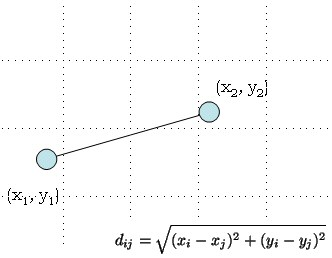
<br>
***Vantagens:***
    * Alta precisão,
    * Insensivel a outliers.

***Desvantagens:***
    * Computacionalmente caro (Lazy learning),
    * Requer muita memória.


## Caso 1: Qualidade de vinho

<justify>O objetivo desse experimento é determinar quais propriedades físico-químicas tornam um vinho 'bom'!

O objetivo desse experimento é coletar dados de um dataset[1] que possuem registros as propriedades físico-químicas de diversos vinhos (como a quantidade ácido fixo, ácido volátil, cloretos, alcool e ph) seguindo de uma nota de 0 a 10 que indica a qualidade do vinho.

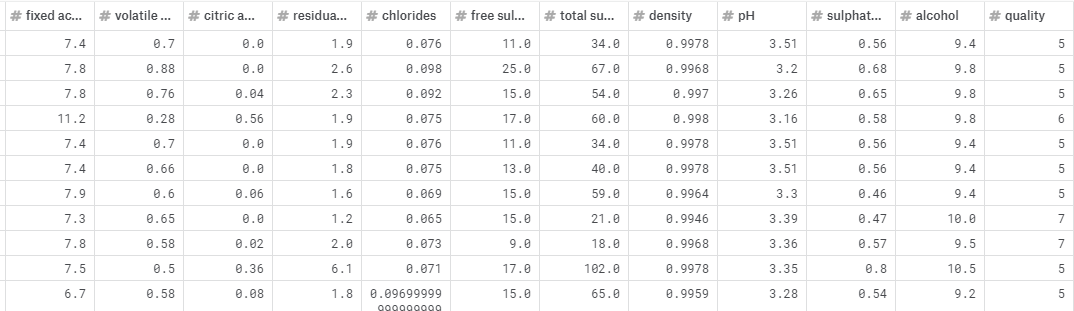
<br>
A função abaixo lê um arquivo (nesse caso, o winequality-red.csv) e salva os atributos preditores (as propriedades de cada vinho) em uma matriz e os atributos de classe (qualidade) em um array. No dataset, como o atributo "quality" está definido entre 0 e 10, nesse exemplos os vinhos com nota maior ou igual a 7 receberam o rótulo de "good" (bom) e os outros receberam "bad".



In [45]:
def readFile(filename):
    file = open(filename, 'r')
    predictors = []# Previsores
    classes = []
    next(file)   # Salta a primeira linha
    for line in file:
        line = line.strip() # remove os \n
        line = line.split(',')
        predictors.append(line[:11])

        # Bom ou ruim
        if(int(line[-1]) >= 7):
            classes.append('good')
        else:
            classes.append('bad')
    predictors = np.array(predictors, dtype =np.float)
    file.close()
    return predictors, classes

In [46]:
predictors, labels = readFile('data/winequality-red.csv')

In [47]:
predictors # Propriedades dos vinhos (dados preditores)

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [48]:
labels    # Qualidade (rótulo)

['bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'good',
 'good',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'good',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'good',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'good',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'b

#### Normalização

Para que todas as variáveis fiquem na mesma ordem de grandeza, a matriz _predictors_ precisa ser normalizada (colocando as variáveis entre 0 e 1). Fórmula:

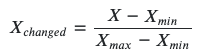

In [49]:
def normalize(dataset):
    minValues = dataset.min(axis = 0) # Pega os minimos das colunas
    maxValues = dataset.max(axis = 0)
    #Redimensionando os min e max valores
    minValues = np.tile(minValues, (dataset.shape[0], 1))
    maxValues = np.tile(maxValues, (dataset.shape[0], 1))
    # Fazendo a normalização
    normalizedData = np.zeros(np.shape(dataset))
    normalizedData = (dataset - minValues)/(maxValues - minValues)

    return normalizedData


In [50]:
normalizedMatrix = normalize(predictors)

In [51]:
normalizedMatrix    # Dados normalizados

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

#### Classificador

A função abaixo recebe o valor X que será classificado, a matriz normalizada, os labels e um número inteiro K (Que indica a quantidade de vizinhos mais próximos do X).
<br><br>
Será calculada a distancia euclidiana entre X e os outros valores valores do dataset, depois será criado um dicionário (Onde os labels são a chave e o valor é a quantidade ) para realizar a "votação" entre os K mais próximos do X.  que tiver a maior quantidade de votos (o mais proximos dos K elementos) 


In [52]:
def classify(X, dataset, labels, k):
    sizeD = dataset.shape[0]
    mEuclideanDistance = np.tile(X, (sizeD, 1)) - dataset
    mEuclideanDistance = mEuclideanDistance**2
    mEuclideanDistance = mEuclideanDistance.sum(axis=1)
    mEuclideanDistance = mEuclideanDistance**0.5
    # Votacao
    ordered = mEuclideanDistance.argsort()                 # Indices ordenados
    voteLabels = {}                                        # Dicionario para realizar a votacao
    for i in range(k):
        label = labels[ordered[i]]
        voteLabels[label] = voteLabels.get(label, 0) + 1   # Adiciona 1 no label correspondente

    voteLabels = sorted(voteLabels.items(), key=operator.itemgetter(1),
                           reverse=True)                   #  Decompõe o dicionario em uma lista de tuplas e "ordena" do maior ao menor
    return voteLabels[0][0]

In [53]:
# Testando a função para classificar oprimeiro elemento
classify(normalizedMatrix[0,:], normalizedMatrix, labels, 3) 

'bad'

#### Testando o classificador

A função abaixo é independente e serve para testar a eficiência/acurácia do classificador (Mandando classificar valores e comparando com areposta esperada). A variável percentTrain define a porcentagem de dados que serão utilizados para o teste, esses dados serão classificiados com base no resto dos valores do dataset. 


A função também calcula a taxa de erro, que é dada pela soma dos erros do classificador (quando a qualidade do vinho retornada por ele é diferente da qualidade esperada) divido pelo número de testes.

In [54]:
def testeClassificador():
    percentTrain = 0.20 # 20%
    dados, labels = readFile('data/winequality-red.csv')
    normMatriz = normalize(dados)
    m = normMatriz.shape[0] # Tamanho da matriz
    numTeste = int(m*percentTrain)   #Numeros de dados de teste 
    errorCount = 0.0

    for i in range(numTeste):
        resultadoClassificador = classify(normMatriz[i, :], normMatriz[numTeste:m, :],
                                           labels[numTeste:m], 3)
        print("O Classificador retornou: %s, o valor esperado era: %s" % (resultadoClassificador, labels[i]))
        if(resultadoClassificador != labels[i]):
            errorCount += 1.0

    print("Taxa de erro: %f" % (errorCount/float(numTeste)))

In [55]:
testeClassificador()

O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: good
O Classificador retornou: bad, o valor esperado era: good
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: good
O Classificador retornou: ba

O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, o valor esperado era: bad
O Classificador retornou: bad, 

A taxa de erro obtida foi 0.0752, o que siginifica que o classificador possui cerca de 99.93% de precisão.

## Caso 2: Reconhecimento

...

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.